<a href="https://colab.research.google.com/github/DarkWindman/Web-2024/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import csv
import re
import pandas as pd
from datetime import datetime

seans = pd.read_csv('/content/sample_data/seans.txt')
seans.dropna(inplace=True)
seans['Day'] = pd.to_datetime(seans['Day'], format='%d.%m.%Y')
seans['Seans']= seans['Seans'].str.replace('\xa0', '', regex=False)
seans['Seans'] = seans['Seans'].astype(float)
seans.head()

,Day,Seans
0,2023-02-01,2842.0
1,2023-02-02,2743.0
2,2023-02-03,2238.0
3,2023-02-04,1715.0
4,2023-02-05,1803.0


In [4]:
data = pd.read_csv('/content/sample_data/seans_time.csv')
data.dropna(inplace=True)

def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

data['Time_in_seconds'] = data['Time'].apply(time_to_seconds)
data['Day'] = pd.to_datetime(data['Day'], format='%d.%m.%Y')

data.head()

,Day,Time,Time_in_seconds
0,2023-02-01,00:02:19,139
1,2023-02-02,00:03:01,181
2,2023-02-03,00:02:49,169
3,2023-02-04,00:02:13,133
4,2023-02-05,00:01:57,117


In [31]:
page = pd.read_csv('/content/sample_data/pages.csv')
page.dropna(inplace=True)
page['Pages']= page['Pages'].str.replace('\xa0', '', regex=False)
page['Pages'] = page['Pages'].astype(float)
df = pd.DataFrame(page)

# Перетворюємо стовпець "Дата" на формат "рррр-мм-дд"
df['Day'] = pd.to_datetime(df['Day'], format='%d.%m.%y')

df.head()

,Day,Pages
0,2023-02-01,9470.0
1,2023-02-02,10116.0
2,2023-02-03,8886.0
3,2023-02-04,5025.0
4,2023-02-05,5339.0


In [15]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


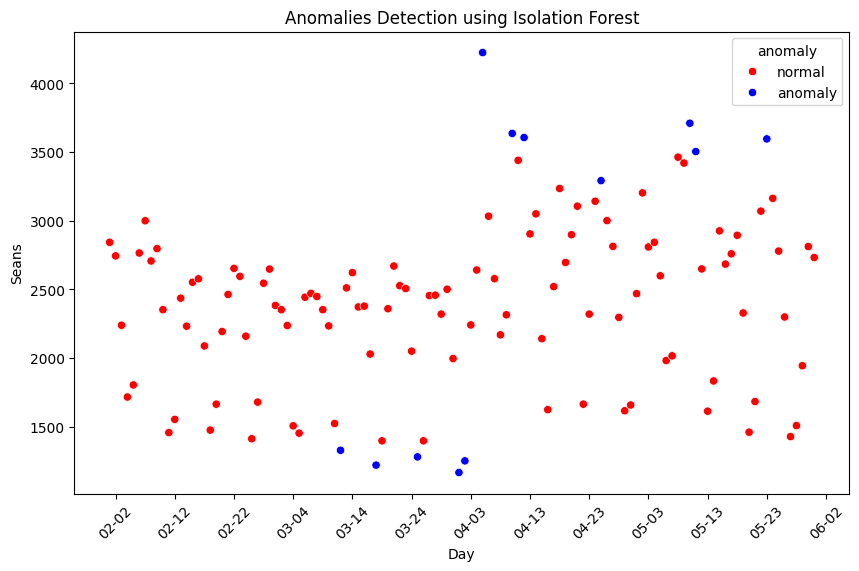

In [ ]:
X1 = seans[['Seans']]


iso_forest = IsolationForest(contamination=0.1, random_state=42)


seans['anomaly'] = iso_forest.fit_predict(X1)

seans['anomaly'] = seans['anomaly'].apply(lambda x: 'anomaly' if x == -1 else 'normal')
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))
sns.scatterplot(data=seans, x='Day', y='Seans', hue='anomaly', palette=['red', 'blue'])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.title('Anomalies Detection using Isolation Forest')
plt.xlabel('Day')
plt.ylabel('Seans')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


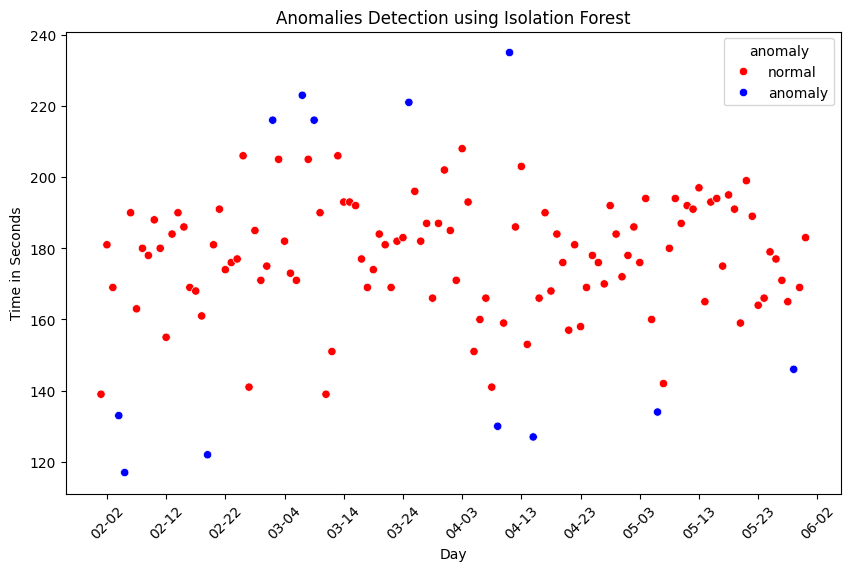

In [ ]:
X2 = data[['Time_in_seconds']]


iso_forest = IsolationForest(contamination=0.1, random_state=42)


data['anomaly'] = iso_forest.fit_predict(X2)


data['anomaly'] = data['anomaly'].apply(lambda x: 'anomaly' if x == -1 else 'normal')
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Day', y='Time_in_seconds', hue='anomaly', palette=['red', 'blue'])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Мітки через кожен день
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))  # Формат міток
plt.title('Anomalies Detection using Isolation Forest')
plt.xlabel('Day')
plt.ylabel('Time in Seconds')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


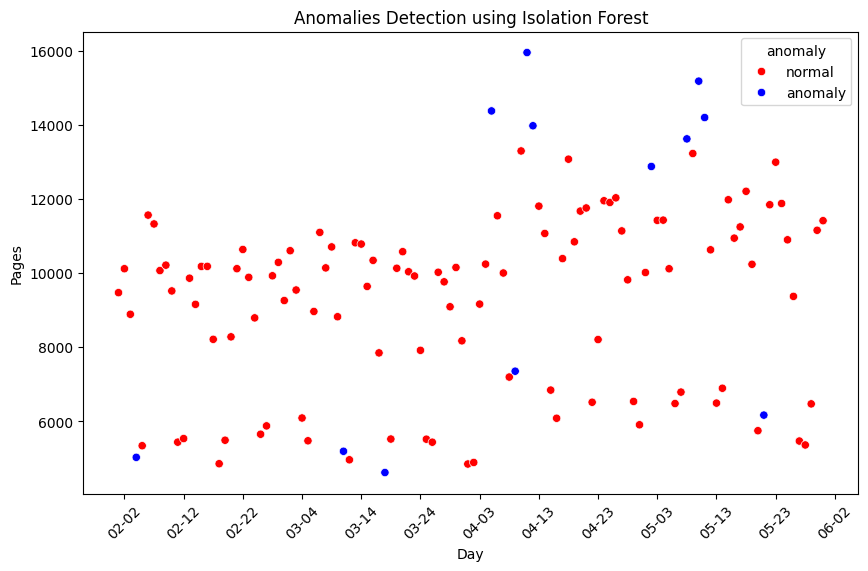

In [32]:
X3 = df[['Pages']]


iso_forest = IsolationForest(contamination=0.1, random_state=42)


df['anomaly'] = iso_forest.fit_predict(X3)

df['anomaly'] = df['anomaly'].apply(lambda x: 'anomaly' if x == -1 else 'normal')
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Day', y='Pages', hue='anomaly', palette=['red', 'blue'])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Мітки через кожен день
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))  # Формат міток
plt.title('Anomalies Detection using Isolation Forest')
plt.xlabel('Day')
plt.ylabel('Pages')
plt.xticks(rotation=45)
plt.show()

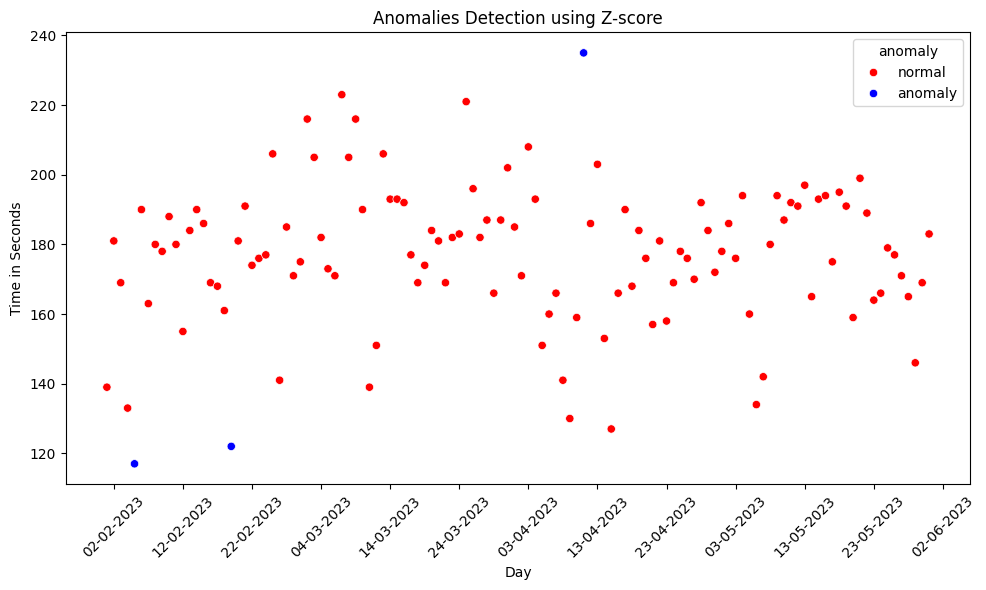

In [20]:
from scipy.stats import zscore
import numpy as np
data['zscore'] = zscore(data['Time_in_seconds'])

data['anomaly'] = data['zscore'].apply(lambda x: 'anomaly' if np.abs(x) > 2.5 else 'normal')


plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Day', y='Time_in_seconds', hue='anomaly', palette=['red', 'blue'])


plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

plt.title('Anomalies Detection using Z-score')
plt.xlabel('Day')
plt.ylabel('Time in Seconds')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

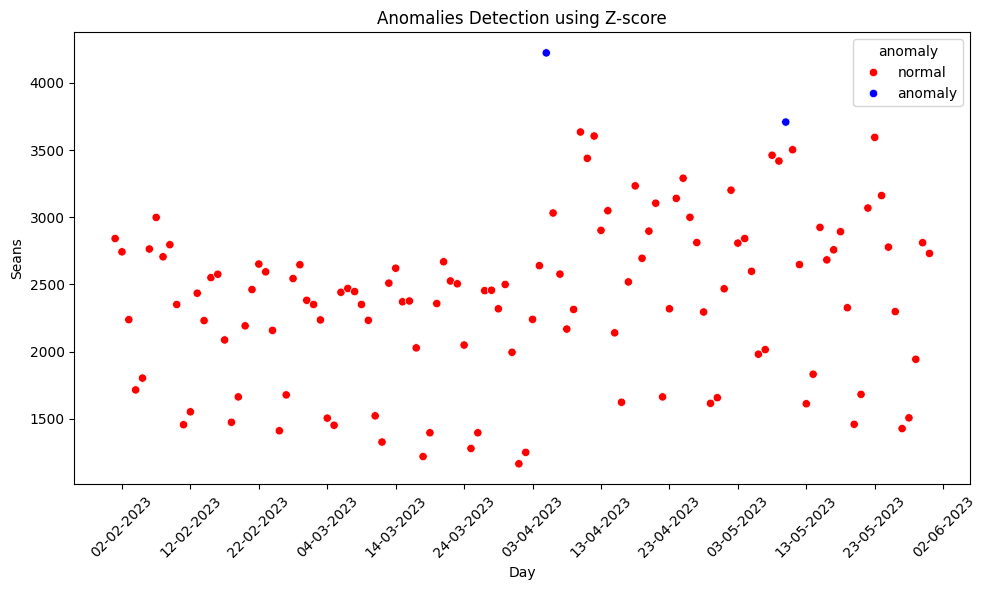

In [ ]:
from scipy.stats import zscore
import numpy as np
seans['zscore'] = zscore(seans['Seans'])


seans['anomaly'] = seans['zscore'].apply(lambda x: 'anomaly' if np.abs(x) > 2 else 'normal')


plt.figure(figsize=(10, 6))
sns.scatterplot(data=seans, x='Day', y='Seans', hue='anomaly', palette=['red', 'blue'])


plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

plt.title('Anomalies Detection using Z-score')
plt.xlabel('Day')
plt.ylabel('Seans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

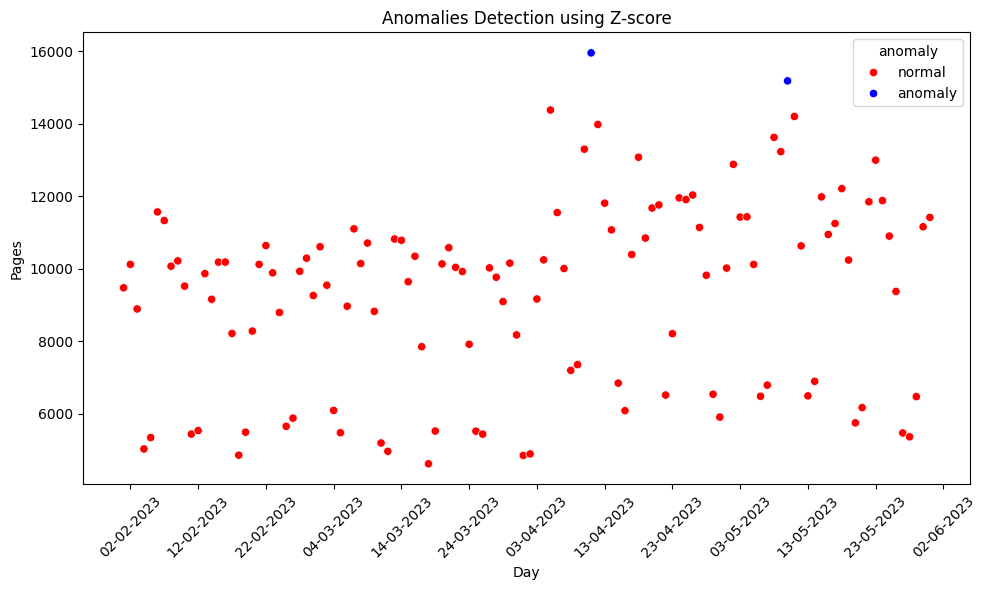

In [33]:
df['zscore'] = zscore(df['Pages'])


df['anomaly'] = df['zscore'].apply(lambda x: 'anomaly' if np.abs(x) > 2 else 'normal')


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Day', y='Pages', hue='anomaly', palette=['red', 'blue'])


plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

plt.title('Anomalies Detection using Z-score')
plt.xlabel('Day')
plt.ylabel('Pages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-21-cc3b9d0f8132>:12: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(data=data, x='Day', y='Time_in_seconds', hue='anomaly', palette=['red', 'blue'])


<function matplotlib.pyplot.gca()>

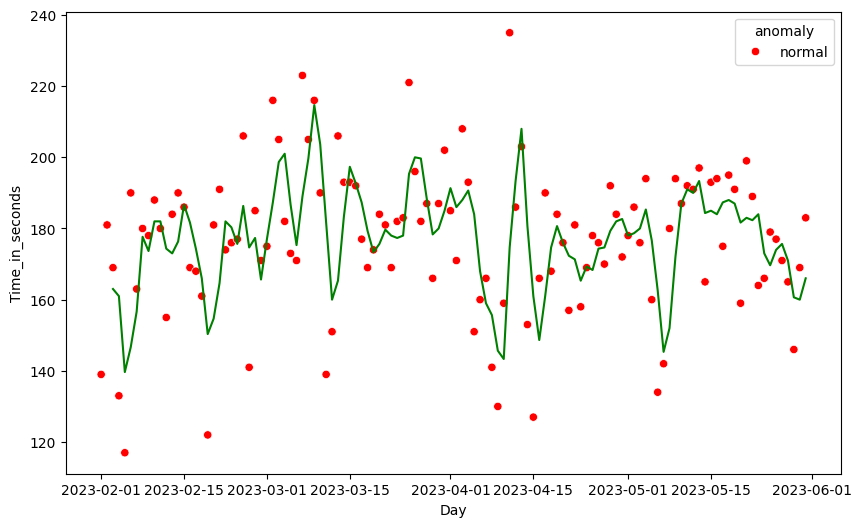

In [21]:
window_size = 3
data['moving_avg'] = data['Time_in_seconds'].rolling(window=window_size).mean()
data['moving_std'] = data['Time_in_seconds'].rolling(window=window_size).std()


data['anomaly'] = np.where((data['Time_in_seconds'] > data['moving_avg'] + 2 * data['moving_std']) |
                           (data['Time_in_seconds'] < data['moving_avg'] - 2 * data['moving_std']),
                           'anomaly', 'normal')


plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Day', y='Time_in_seconds', hue='anomaly', palette=['red', 'blue'])
plt.plot(data['Day'], data['moving_avg'], color='green', label='Moving Average')

plt.gca

<function matplotlib.pyplot.gca()>

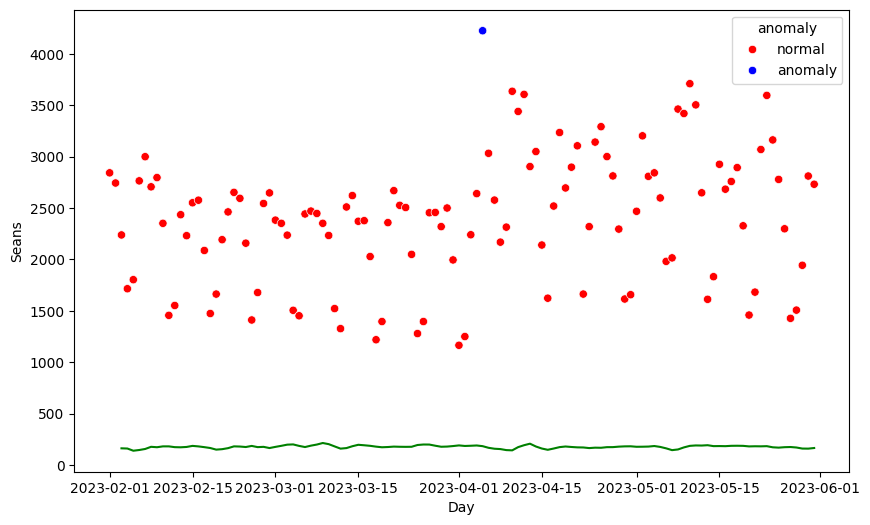

In [ ]:
window_size = 10
seans['moving_avg'] = seans['Seans'].rolling(window=window_size).mean()
seans['moving_std'] = seans['Seans'].rolling(window=window_size).std()


seans['anomaly'] = np.where((seans['Seans'] > seans['moving_avg'] + 2 * seans['moving_std']) |
                           (seans['Seans'] < seans['moving_avg'] - 2 * seans['moving_std']),
                           'anomaly', 'normal')


plt.figure(figsize=(10, 6))
sns.scatterplot(data=seans, x='Day', y='Seans', hue='anomaly', palette=['red', 'blue'])
plt.plot(data['Day'], data['moving_avg'], color='green', label='Moving Average')


plt.gca

<ipython-input-34-0bd479388f93>:12: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(data=df, x='Day', y='Pages', hue='anomaly', palette=['red', 'blue'])


<function matplotlib.pyplot.gca()>

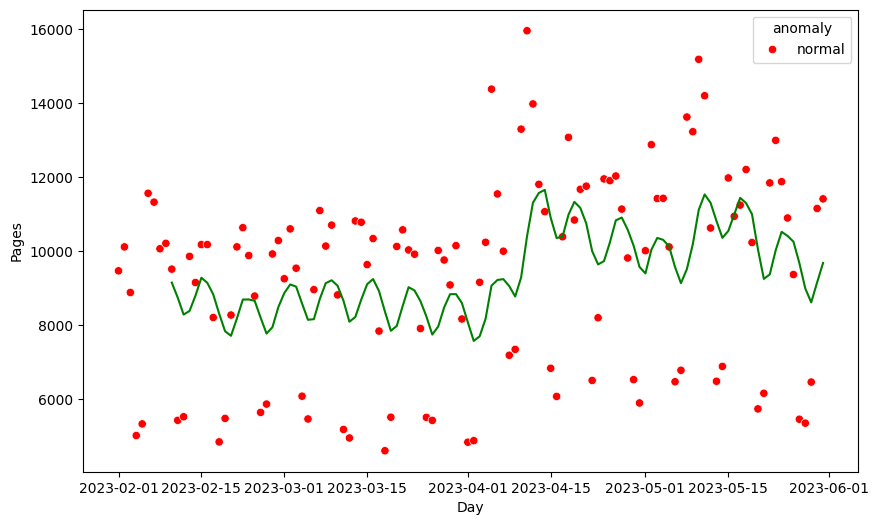

In [34]:
window_size = 10
df['moving_avg'] = df['Pages'].rolling(window=window_size).mean()
df['moving_std'] = df['Pages'].rolling(window=window_size).std()


df['anomaly'] = np.where((df['Pages'] > df['moving_avg'] + 2 * df['moving_std']) |
                           (df['Pages'] < df['moving_avg'] - 2 * df['moving_std']),
                           'anomaly', 'normal')


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Day', y='Pages', hue='anomaly', palette=['red', 'blue'])
plt.plot(df['Day'], df['moving_avg'], color='green', label='Moving Average')


plt.gca

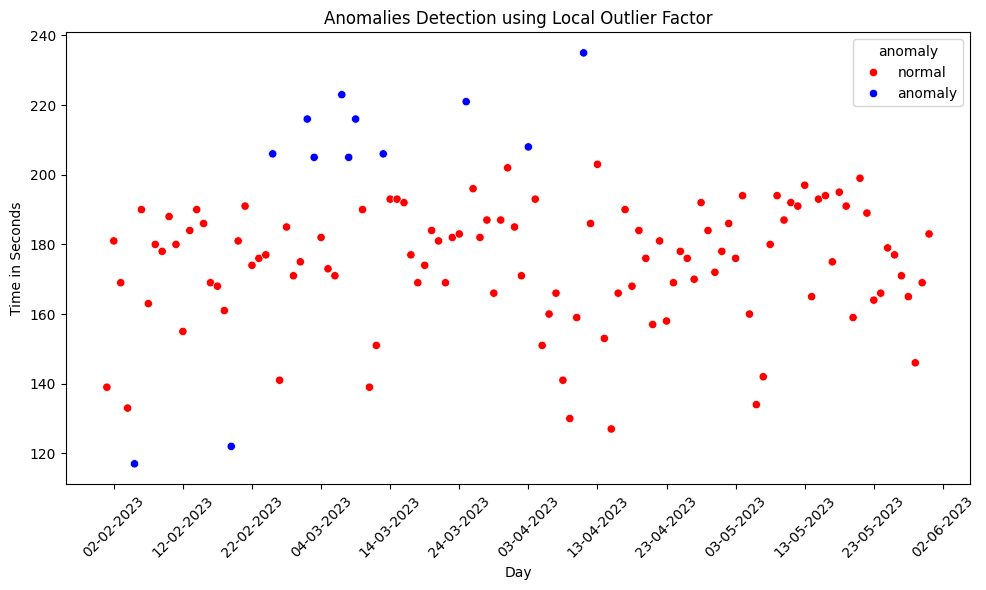

In [ ]:
X = data[['Time_in_seconds']]
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)


data['anomaly'] = lof.fit_predict(X)


data['anomaly'] = data['anomaly'].apply(lambda x: 'anomaly' if x == -1 else 'normal')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Day', y='Time_in_seconds', hue='anomaly', palette=['red', 'blue'])


plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

plt.title('Anomalies Detection using Local Outlier Factor')
plt.xlabel('Day')
plt.ylabel('Time in Seconds')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

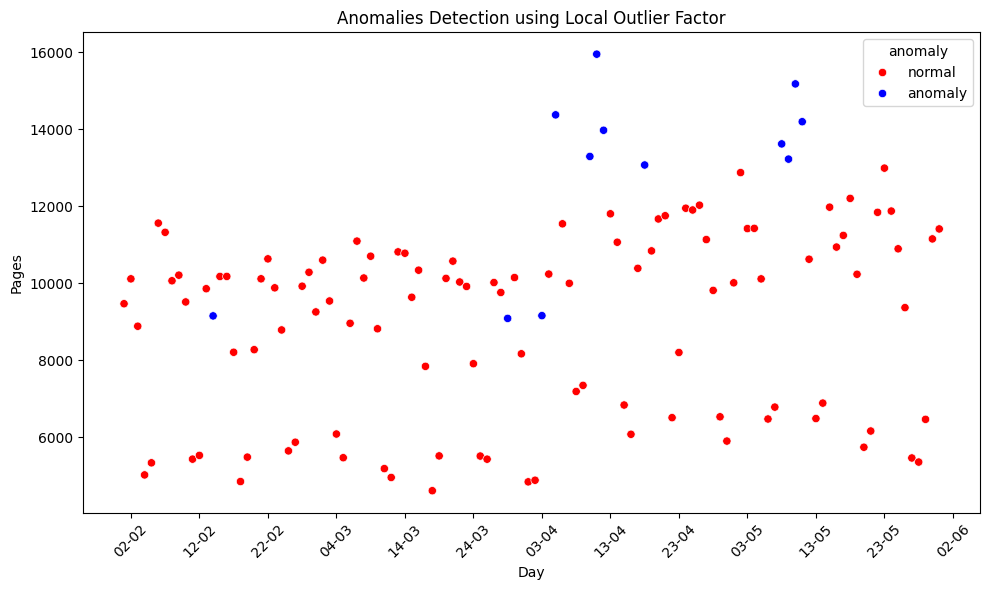

In [35]:
X = df[['Pages']]
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)


df['anomaly'] = lof.fit_predict(X)


df['anomaly'] = df['anomaly'].apply(lambda x: 'anomaly' if x == -1 else 'normal')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Day', y='Pages', hue='anomaly', palette=['red', 'blue'])


plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

plt.title('Anomalies Detection using Local Outlier Factor')
plt.xlabel('Day')
plt.ylabel('Pages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

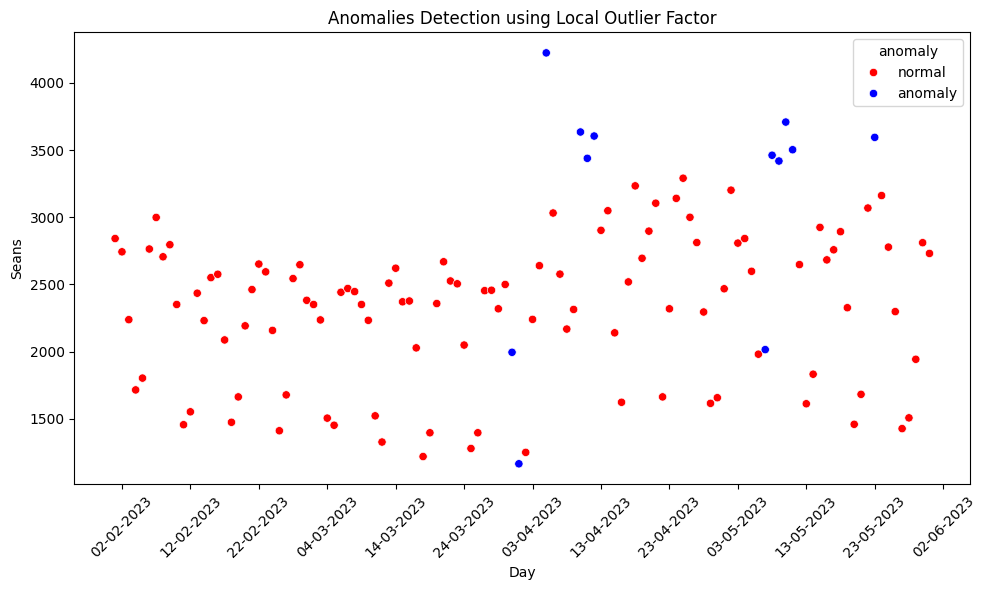

In [28]:
X = seans[['Seans']]
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)


seans['anomaly'] = lof.fit_predict(X)


seans['anomaly'] = seans['anomaly'].apply(lambda x: 'anomaly' if x == -1 else 'normal')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=seans, x='Day', y='Seans', hue='anomaly', palette=['red', 'blue'])


plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

plt.title('Anomalies Detection using Local Outlier Factor')
plt.xlabel('Day')
plt.ylabel('Seans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()